# Preprocesar y limpiar los datos :) 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv("popularity.csv")
df.head()

/var/folders/bx/0fhb_jz13rd9tr24kwrp9cf00000gn/T/ipykernel_47651/3075573236.py:1: DtypeWarning: Columns (9,10,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("popularity.csv")


,mbid,title,artist,duration_ms,genre,year,spotify_id,popularity,release_date,artist_id,artist_popularity,artist_followers,extraction_date
0,50971422-fed2-47ad-9a6f-eacf64ebb965,Shades of Green (Utah Saints 7″ remix),The Mission,238066.0,rock,2015,5lhyOLtwTpzSAyVlfeafOa,2,2006-01-01,4SAdMucvHyws4QTeAUsPtE,43,180767.0,2025-05-26
1,76c66068-5d89-45c2-92be-22f7562dfa3c,Mr. Pleasant,The Mission,170506.0,rock,2015,2crKEyAPuOFiP4NRIblZBB,15,1990-01-01,4SAdMucvHyws4QTeAUsPtE,43,180767.0,2025-05-26
2,e9da3272-429d-41a2-b84d-b0c09b99a286,118,Mono Inc.,272000.0,rock,2015,4dfGvNJErGmUgAXnm1KyPW,8,2020-11-27,1189BemPY7h2lgaH1pkzGX,51,147674.0,2025-05-26
3,86f3c7ed-ad1b-4fc8-9679-a89fb2a50435,Someday Somewhere Somehow,To/Die/For,399466.0,rock,2015,3oUYUG2VYb7irH6466ypzM,5,2012-07-27,6odEUy7osvwibc1yNvxt5u,33,47119.0,2025-05-26
4,9c45c16f-addc-4a53-ad2b-f5481556bfcb,Folie á deux,To/Die/For,432000.0,rock,2015,0D0ejw5SaBXYqEpkzfeNUU,12,2012-07-27,6odEUy7osvwibc1yNvxt5u,33,47119.0,2025-05-26


In [4]:
df.shape 
df.columns 
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70150 entries, 0 to 70149
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   mbid               70150 non-null  object 
 1   title              70150 non-null  object 
 2   artist             70150 non-null  object 
 3   duration_ms        69732 non-null  float64
 4   genre              70150 non-null  object 
 5   year               70150 non-null  int64  
 6   spotify_id         70150 non-null  object 
 7   popularity         70150 non-null  int64  
 8   release_date       70150 non-null  object 
 9   artist_id          4500 non-null   object 
 10  artist_popularity  4353 non-null   object 
 11  artist_followers   4053 non-null   float64
 12  extraction_date    4200 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 7.0+ MB


In [5]:
df['genre'].unique()

array(['rock', 'pop', 'hip hop', 'electronic', 'classical'], dtype=object)

In [6]:
df['genre'].value_counts()

genre
rock          25413
pop           19168
electronic    11280
hip hop        7397
classical      6892
Name: count, dtype: int64

In [7]:
df.isnull().sum().sort_values(ascending=False)

artist_followers     66097
extraction_date      65950
artist_popularity    65797
artist_id            65650
duration_ms            418
mbid                     0
title                    0
artist                   0
genre                    0
year                     0
spotify_id               0
popularity               0
release_date             0
dtype: int64

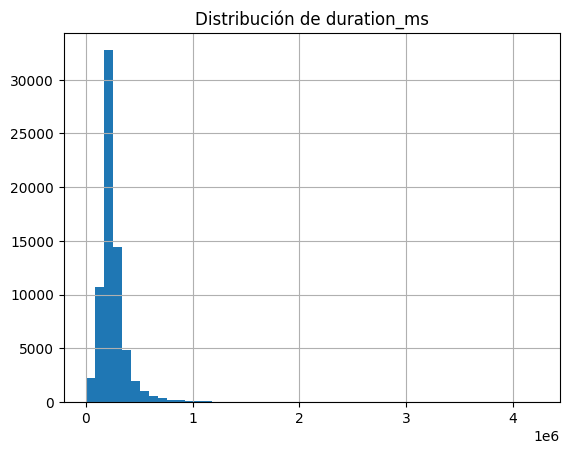

In [8]:
df['duration_ms'].hist(bins=50)
plt.title("Distribución de duration_ms")
plt.show()

In [9]:
df['duration_ms'].fillna(df['duration_ms'].median(), inplace=True)

/var/folders/bx/0fhb_jz13rd9tr24kwrp9cf00000gn/T/ipykernel_47651/3016367298.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['duration_ms'].fillna(df['duration_ms'].median(), inplace=True)


In [10]:
df = df.drop_duplicates()

### Eliminar columnas con demasiodos nulos 

In [11]:
#Eliminar las columnas con muchos nulos
df = df.drop(columns=['artist_followers', 'extraction_date', 'artist_popularity', 'artist_id' ])

In [12]:
df

,mbid,title,artist,duration_ms,genre,year,spotify_id,popularity,release_date
0,50971422-fed2-47ad-9a6f-eacf64ebb965,Shades of Green (Utah Saints 7″ remix),The Mission,238066.0,rock,2015,5lhyOLtwTpzSAyVlfeafOa,2,2006-01-01
1,76c66068-5d89-45c2-92be-22f7562dfa3c,Mr. Pleasant,The Mission,170506.0,rock,2015,2crKEyAPuOFiP4NRIblZBB,15,1990-01-01
2,e9da3272-429d-41a2-b84d-b0c09b99a286,118,Mono Inc.,272000.0,rock,2015,4dfGvNJErGmUgAXnm1KyPW,8,2020-11-27
3,86f3c7ed-ad1b-4fc8-9679-a89fb2a50435,Someday Somewhere Somehow,To/Die/For,399466.0,rock,2015,3oUYUG2VYb7irH6466ypzM,5,2012-07-27
4,9c45c16f-addc-4a53-ad2b-f5481556bfcb,Folie á deux,To/Die/For,432000.0,rock,2015,0D0ejw5SaBXYqEpkzfeNUU,12,2012-07-27
...,...,...,...,...,...,...,...,...,...
70145,bba9be29-e498-464c-8c9a-35e0fc0ba7a4,"Die Zauberflöte, K. 620, Act 1: ""Zu Hilfe!""",Klaus Florian Vogt,357000.0,classical,2019,0aokaoGfboA5KvWZAnNRDf,15,2025-06-24
70146,419fbfec-5398-4d3f-a8d2-38d5269f5c39,"Die Zauberflöte, K. 620, Act 1: ""Die Weisheits...",Klaus Florian Vogt,448000.0,classical,2019,4x6eBPkH0oKfhZQldonnsC,12,2025-06-24
70147,5094b70d-985d-43c8-9177-ef12d37ba26c,"Symphony no. 40 in G minor, K. 550: 3. Menuett...",London Philharmonic Orchestra,245000.0,classical,2019,3f4vyK0Ku5ua2pkSvg9vKm,1,2025-06-24
70148,29f320c6-b5aa-4ffb-9764-23cc1fd425eb,Romeo and Juliet,Berliner Philharmoniker,1332000.0,classical,2019,1OOZp1VDmU3CQeHbXagofh,34,2025-06-24


### Eliminar nulos en columna duración con median 

In [13]:

df['duration_ms'] = df['duration_ms'].fillna(df['duration_ms'].median())

In [14]:
df.isnull().sum().sort_values(ascending=False)

mbid            0
title           0
artist          0
duration_ms     0
genre           0
year            0
spotify_id      0
popularity      0
release_date    0
dtype: int64

### Eliminar duplicados

### Corrección de tipos de datos

In [15]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

In [16]:
df.head()

,mbid,title,artist,duration_ms,genre,year,spotify_id,popularity,release_date
0,50971422-fed2-47ad-9a6f-eacf64ebb965,Shades of Green (Utah Saints 7″ remix),The Mission,238066.0,rock,2015,5lhyOLtwTpzSAyVlfeafOa,2,2006-01-01
1,76c66068-5d89-45c2-92be-22f7562dfa3c,Mr. Pleasant,The Mission,170506.0,rock,2015,2crKEyAPuOFiP4NRIblZBB,15,1990-01-01
2,e9da3272-429d-41a2-b84d-b0c09b99a286,118,Mono Inc.,272000.0,rock,2015,4dfGvNJErGmUgAXnm1KyPW,8,2020-11-27
3,86f3c7ed-ad1b-4fc8-9679-a89fb2a50435,Someday Somewhere Somehow,To/Die/For,399466.0,rock,2015,3oUYUG2VYb7irH6466ypzM,5,2012-07-27
4,9c45c16f-addc-4a53-ad2b-f5481556bfcb,Folie á deux,To/Die/For,432000.0,rock,2015,0D0ejw5SaBXYqEpkzfeNUU,12,2012-07-27


In [17]:
df.dtypes

mbid                    object
title                   object
artist                  object
duration_ms            float64
genre                   object
year                     int64
spotify_id              object
popularity               int64
release_date    datetime64[ns]
dtype: object

In [18]:
df.describe()

,duration_ms,year,popularity,release_date
count,7.015000e+04,70150.000000,70150.000000,69735
mean,2.536520e+05,2017.837947,23.704134,2024-07-23 17:50:16.132501504
min,3.000000e+03,2015.000000,0.000000,1962-12-10 00:00:00
25%,1.860000e+05,2016.000000,6.000000,2025-06-09 00:00:00
50%,2.268330e+05,2017.000000,19.000000,2025-06-14 00:00:00
75%,2.830000e+05,2020.000000,37.000000,2025-06-19 00:00:00
max,4.227000e+06,2022.000000,94.000000,2025-06-24 00:00:00
std,1.444839e+05,2.231303,20.581739,NaN


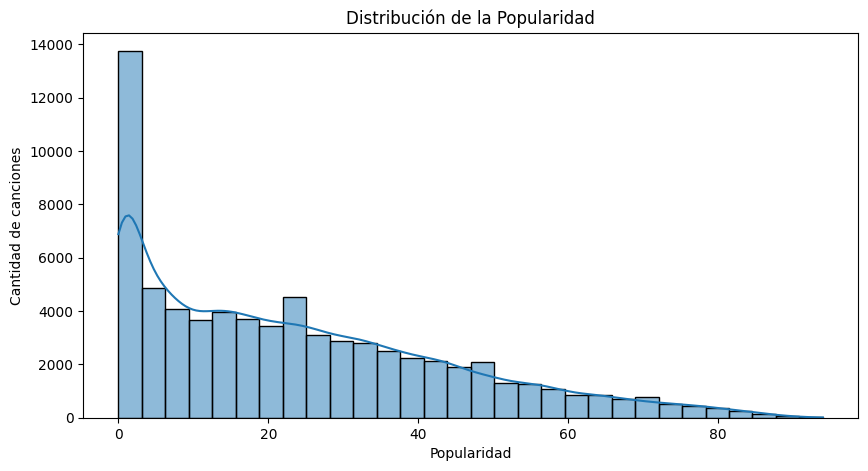

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(df['popularity'], bins=30, kde=True)
plt.title("Distribución de la Popularidad")
plt.xlabel("Popularidad")
plt.ylabel("Cantidad de canciones")
plt.show()

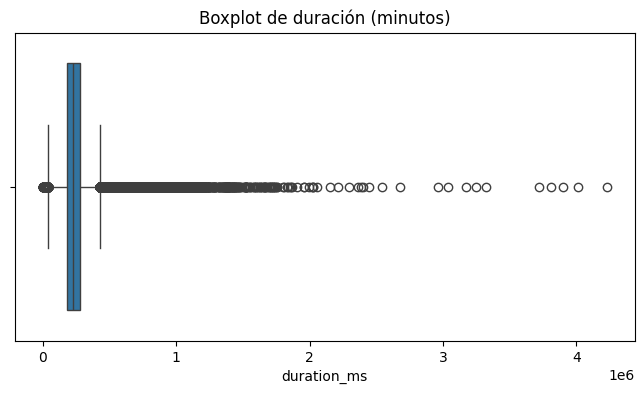

In [20]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['duration_ms'])
plt.title("Boxplot de duración (minutos)")
plt.show()

In [21]:
df = df[df['duration_ms'] <= 900000]

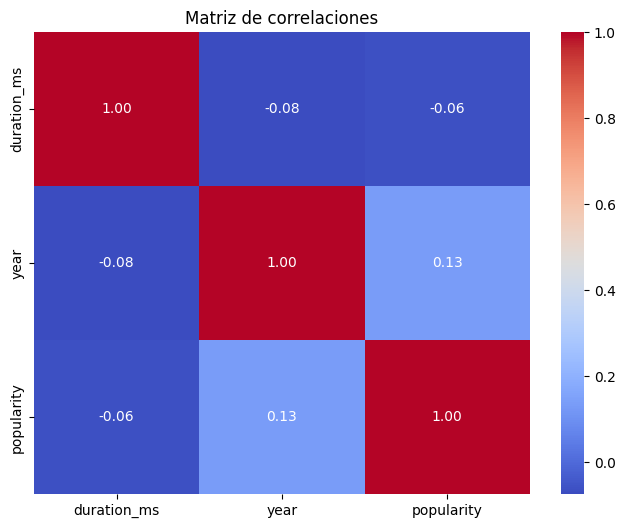

In [22]:
numeric_cols = ['duration_ms', 'year', 'popularity']
corr = df[numeric_cols].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlaciones")
plt.show()

In [23]:
text_cols = ['title', 'artist', 'genre']

for col in text_cols:
    df[col] = df[col].astype(str).str.strip().str.lower()

/var/folders/bx/0fhb_jz13rd9tr24kwrp9cf00000gn/T/ipykernel_47651/2031399649.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(str).str.strip().str.lower()
/var/folders/bx/0fhb_jz13rd9tr24kwrp9cf00000gn/T/ipykernel_47651/2031399649.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(str).str.strip().str.lower()
/var/folders/bx/0fhb_jz13rd9tr24kwrp9cf00000gn/T/ipykernel_47651/2031399649.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [24]:
df.head()

,mbid,title,artist,duration_ms,genre,year,spotify_id,popularity,release_date
0,50971422-fed2-47ad-9a6f-eacf64ebb965,shades of green (utah saints 7″ remix),the mission,238066.0,rock,2015,5lhyOLtwTpzSAyVlfeafOa,2,2006-01-01
1,76c66068-5d89-45c2-92be-22f7562dfa3c,mr. pleasant,the mission,170506.0,rock,2015,2crKEyAPuOFiP4NRIblZBB,15,1990-01-01
2,e9da3272-429d-41a2-b84d-b0c09b99a286,118,mono inc.,272000.0,rock,2015,4dfGvNJErGmUgAXnm1KyPW,8,2020-11-27
3,86f3c7ed-ad1b-4fc8-9679-a89fb2a50435,someday somewhere somehow,to/die/for,399466.0,rock,2015,3oUYUG2VYb7irH6466ypzM,5,2012-07-27
4,9c45c16f-addc-4a53-ad2b-f5481556bfcb,folie á deux,to/die/for,432000.0,rock,2015,0D0ejw5SaBXYqEpkzfeNUU,12,2012-07-27


In [25]:
df['popularity'].describe()

count    69604.000000
mean        23.785846
std         20.600495
min          0.000000
25%          6.000000
50%         20.000000
75%         37.000000
max         94.000000
Name: popularity, dtype: float64

In [26]:
df['popularity'].value_counts().sort_index()

popularity
0     6979
1     2732
2     2001
3     1836
4     1581
      ... 
90      19
91       8
92       4
93       1
94       3
Name: count, Length: 95, dtype: int64

In [27]:
df.sort_values(by='popularity', ascending=False)[['title', 'artist', 'popularity']].head(20)

,title,artist,popularity
49414,all the stars,kendrick lamar,94
49743,all the stars,kendrick lamar,94
24004,iris,the goo goo dolls,94
15042,every breath you take,the police,93
36823,starboy,the weeknd,92
25233,end of beginning,djo,92
47988,the night we met,lord huron,92
48997,starboy,the weeknd,92
42921,as it was,harry styles,91
19681,dreams,fleetwood mac,91


In [28]:
top_by_genre = df.sort_values(by='popularity', ascending=False).groupby('genre').head(1)
top_by_genre[['genre', 'title', 'artist', 'popularity']]

,genre,title,artist,popularity
49414,hip hop,all the stars,kendrick lamar,94
24004,rock,iris,the goo goo dolls,94
36823,pop,starboy,the weeknd,92
56111,electronic,closer,the chainsmokers,90
70143,classical,murder on the dancefloor,sophie ellis‐bextor,83


In [29]:
 df.head()

,mbid,title,artist,duration_ms,genre,year,spotify_id,popularity,release_date
0,50971422-fed2-47ad-9a6f-eacf64ebb965,shades of green (utah saints 7″ remix),the mission,238066.0,rock,2015,5lhyOLtwTpzSAyVlfeafOa,2,2006-01-01
1,76c66068-5d89-45c2-92be-22f7562dfa3c,mr. pleasant,the mission,170506.0,rock,2015,2crKEyAPuOFiP4NRIblZBB,15,1990-01-01
2,e9da3272-429d-41a2-b84d-b0c09b99a286,118,mono inc.,272000.0,rock,2015,4dfGvNJErGmUgAXnm1KyPW,8,2020-11-27
3,86f3c7ed-ad1b-4fc8-9679-a89fb2a50435,someday somewhere somehow,to/die/for,399466.0,rock,2015,3oUYUG2VYb7irH6466ypzM,5,2012-07-27
4,9c45c16f-addc-4a53-ad2b-f5481556bfcb,folie á deux,to/die/for,432000.0,rock,2015,0D0ejw5SaBXYqEpkzfeNUU,12,2012-07-27


In [30]:
columns_to_scale = ['duration_ms', 'year', 'popularity']
scaler = MinMaxScaler()

df_scaled = df.copy()
df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [31]:
df_scaled.head()

,mbid,title,artist,duration_ms,genre,year,spotify_id,popularity,release_date
0,50971422-fed2-47ad-9a6f-eacf64ebb965,shades of green (utah saints 7″ remix),the mission,0.262058,rock,0.0,5lhyOLtwTpzSAyVlfeafOa,0.021277,2006-01-01
1,76c66068-5d89-45c2-92be-22f7562dfa3c,mr. pleasant,the mission,0.186740,rock,0.0,2crKEyAPuOFiP4NRIblZBB,0.159574,1990-01-01
2,e9da3272-429d-41a2-b84d-b0c09b99a286,118,mono inc.,0.299889,rock,0.0,4dfGvNJErGmUgAXnm1KyPW,0.085106,2020-11-27
3,86f3c7ed-ad1b-4fc8-9679-a89fb2a50435,someday somewhere somehow,to/die/for,0.441991,rock,0.0,3oUYUG2VYb7irH6466ypzM,0.053191,2012-07-27
4,9c45c16f-addc-4a53-ad2b-f5481556bfcb,folie á deux,to/die/for,0.478261,rock,0.0,0D0ejw5SaBXYqEpkzfeNUU,0.127660,2012-07-27


In [32]:
top_by_genre = df_scaled.sort_values(by='popularity', ascending=False).groupby('genre').head(1)
top_by_genre[['genre', 'title', 'artist', 'popularity']]

,genre,title,artist,popularity
49414,hip hop,all the stars,kendrick lamar,1.000000
24004,rock,iris,the goo goo dolls,1.000000
36823,pop,starboy,the weeknd,0.978723
56111,electronic,closer,the chainsmokers,0.957447
70143,classical,murder on the dancefloor,sophie ellis‐bextor,0.882979


In [33]:
df_scaled[columns_to_scale].describe()

,duration_ms,year,popularity
count,69604.000000,69604.000000,69604.000000
mean,0.270853,0.406290,0.253041
std,0.122042,0.318914,0.219154
min,0.000000,0.000000,0.000000
25%,0.204013,0.142857,0.063830
50%,0.249231,0.285714,0.212766
75%,0.309922,0.714286,0.393617
max,1.000000,1.000000,1.000000


In [34]:
df_features = pd.read_csv('features_full_final.csv')
df_features.head()

,mbid,title,artist,genre,year,duration_ms,high_danceability_value,high_danceability_probability,high_gender_value,high_gender_probability,...,low_chords_key,low_chords_number_rate,low_tuning_nontempered_energy_ratio,low_tuning_frequency,low_tuning_diatonic_strength,low_tuning_equal_tempered_deviation,low_danceability,low_onset_rate,low_bpm,low_beats_count
0,c49650c9-bb57-4657-9061-f963f79d37ff,Мой рок-н-ролл,Би-2,rock,2015,405000.0,danceable,0.741577,female,0.980535,...,A,0.001260,0.746798,437.213165,0.531848,0.103362,1.066156,3.157307,119.776863,799.0
1,5ec4db4b-f908-4c2b-83ae-42ba3c1f84f4,Old Coast Road,The Church,rock,2015,261000.0,not_danceable,0.549704,male,0.798097,...,G,0.001423,0.633145,442.037933,0.655566,0.028788,1.042624,3.357018,109.032303,473.0
2,b48f66bd-6871-4974-8bd5-e3b7f21b8934,Laurel Canyon,The Church,rock,2015,264000.0,not_danceable,0.862171,male,0.956642,...,D,0.001409,0.978143,434.193115,0.558443,0.274668,0.984962,3.839930,166.434998,723.0
3,ccd36f0d-b5ad-46fb-8bda-bafb653ad2d6,Delirious,The Church,rock,2015,285000.0,not_danceable,0.595985,male,0.532806,...,D,0.002119,0.662158,445.884552,0.490887,0.031991,0.966426,3.366263,150.748550,700.0
4,0af5c701-8567-4ac5-ab42-a8ba3513809b,Miami,The Church,rock,2015,519000.0,not_danceable,0.903194,male,0.902327,...,B,0.000895,0.635805,441.017792,0.498651,0.024538,1.023552,2.946507,116.998375,1006.0


In [35]:
df_features.info()
df_features.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111956 entries, 0 to 111955
Data columns (total 82 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   mbid                                 111956 non-null  object 
 1   title                                111956 non-null  object 
 2   artist                               111952 non-null  object 
 3   genre                                111956 non-null  object 
 4   year                                 111956 non-null  int64  
 5   duration_ms                          111576 non-null  float64
 6   high_danceability_value              111753 non-null  object 
 7   high_danceability_probability        111753 non-null  float64
 8   high_gender_value                    111753 non-null  object 
 9   high_gender_probability              111753 non-null  float64
 10  high_genre_dortmund_value            111753 non-null  object 
 11  high_genre_do

(111956, 82)

In [36]:
# limpieza de texto 

text_cols = ['title', 'artist', 'genre']

for col in text_cols:
    df_features[col] = df_features[col].astype(str).str.strip().str.lower()

In [37]:
df_features

,mbid,title,artist,genre,year,duration_ms,high_danceability_value,high_danceability_probability,high_gender_value,high_gender_probability,...,low_chords_key,low_chords_number_rate,low_tuning_nontempered_energy_ratio,low_tuning_frequency,low_tuning_diatonic_strength,low_tuning_equal_tempered_deviation,low_danceability,low_onset_rate,low_bpm,low_beats_count
0,c49650c9-bb57-4657-9061-f963f79d37ff,мой рок-н-ролл,би-2,rock,2015,405000.0,danceable,0.741577,female,0.980535,...,A,0.001260,0.746798,437.213165,0.531848,0.103362,1.066156,3.157307,119.776863,799.0
1,5ec4db4b-f908-4c2b-83ae-42ba3c1f84f4,old coast road,the church,rock,2015,261000.0,not_danceable,0.549704,male,0.798097,...,G,0.001423,0.633145,442.037933,0.655566,0.028788,1.042624,3.357018,109.032303,473.0
2,b48f66bd-6871-4974-8bd5-e3b7f21b8934,laurel canyon,the church,rock,2015,264000.0,not_danceable,0.862171,male,0.956642,...,D,0.001409,0.978143,434.193115,0.558443,0.274668,0.984962,3.839930,166.434998,723.0
3,ccd36f0d-b5ad-46fb-8bda-bafb653ad2d6,delirious,the church,rock,2015,285000.0,not_danceable,0.595985,male,0.532806,...,D,0.002119,0.662158,445.884552,0.490887,0.031991,0.966426,3.366263,150.748550,700.0
4,0af5c701-8567-4ac5-ab42-a8ba3513809b,miami,the church,rock,2015,519000.0,not_danceable,0.903194,male,0.902327,...,B,0.000895,0.635805,441.017792,0.498651,0.024538,1.023552,2.946507,116.998375,1006.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111951,77f1b426-b7ed-45fa-b260-35e7cb8543e2,no hotel,lykke li,folk,2022,146546.0,not_danceable,0.773452,female,0.917693,...,G,0.004118,0.774716,436.708374,0.614823,0.054829,0.935817,2.156049,128.651459,319.0
111952,742600fc-a3ba-4ada-8a80-43ef8132dcf8,you don’t go away,lykke li,folk,2022,193226.0,not_danceable,0.904865,female,0.986230,...,G,0.003123,0.739097,438.731049,0.692444,0.067319,0.895894,2.121625,120.127174,386.0
111953,f6f86270-40e4-4a77-94b4-c2b081e13837,two ribbons,let’s eat grandma,folk,2022,325653.0,not_danceable,0.965314,female,0.740825,...,F,0.001283,0.616940,441.527557,0.628388,0.015644,1.002447,2.266087,172.265244,918.0
111954,82ff5ae2-50c0-48f2-9f3b-d77f7ada1697,honey come home,the head and the heart,folk,2022,201000.0,not_danceable,0.776017,male,0.958390,...,D,0.002320,0.648922,440.508575,0.642561,0.016774,1.079707,3.847222,97.082596,324.0


In [38]:
df_features.isnull().sum().sort_values(ascending=False)

audio_sample_rate                      4532
duration_ms                             380
high_voice_instrumental_probability     203
high_mood_sad_value                     203
high_mood_electronic_value              203
                                       ... 
low_mfcc_mean_9                           0
low_mfcc_mean_10                          0
audio_bit_rate                            0
audio_codec                               0
mbid                                      0
Length: 82, dtype: int64

In [39]:
df_features['duration_ms'] = df_features['duration_ms'].fillna(df_features['duration_ms'].median())

In [40]:
df_features['audio_sample_rate'].value_counts()
df_features['audio_sample_rate'] = df_features['audio_sample_rate'].fillna(df_features['audio_sample_rate'].mode()[0])

In [41]:
df_merged = df_scaled.merge(df_features, on='mbid', how='inner')

In [42]:
df_merged.shape

(58558, 90)

In [43]:
df_merged.columns[df_merged.columns.str.contains('_x|_y')]

Index(['title_x', 'artist_x', 'duration_ms_x', 'genre_x', 'year_x', 'title_y',
       'artist_y', 'genre_y', 'year_y', 'duration_ms_y'],
      dtype='object')

In [44]:
df_merged = df_merged.drop(columns=[
    'title_y', 'artist_y', 'genre_y', 'year_y', 'duration_ms_y'
])

df_merged = df_merged.rename(columns={
    'title_x': 'title',
    'artist_x': 'artist',
    'genre_x': 'genre',
    'year_x': 'year',
    'duration_ms_x': 'duration_ms'
})

In [45]:
df_merged.shape

(58558, 85)

In [46]:
df_merged

,mbid,title,artist,duration_ms,genre,year,spotify_id,popularity,release_date,high_danceability_value,...,low_chords_key,low_chords_number_rate,low_tuning_nontempered_energy_ratio,low_tuning_frequency,low_tuning_diatonic_strength,low_tuning_equal_tempered_deviation,low_danceability,low_onset_rate,low_bpm,low_beats_count
0,50971422-fed2-47ad-9a6f-eacf64ebb965,shades of green (utah saints 7″ remix),the mission,0.262058,rock,0.000000,5lhyOLtwTpzSAyVlfeafOa,0.021277,2006-01-01,danceable,...,D,0.001169,0.896176,434.193115,0.469047,0.247408,1.267642,5.774642,137.296005,543.0
1,76c66068-5d89-45c2-92be-22f7562dfa3c,mr. pleasant,the mission,0.186740,rock,0.000000,2crKEyAPuOFiP4NRIblZBB,0.159574,1990-01-01,not_danceable,...,C,0.003779,0.710286,440.254242,0.585254,0.021512,1.058087,3.302068,102.798195,298.0
2,e9da3272-429d-41a2-b84d-b0c09b99a286,118,mono inc.,0.299889,rock,0.000000,4dfGvNJErGmUgAXnm1KyPW,0.085106,2020-11-27,danceable,...,A,0.001362,0.946769,434.193115,0.628547,0.237035,1.098000,2.625754,172.265198,769.0
3,86f3c7ed-ad1b-4fc8-9679-a89fb2a50435,someday somewhere somehow,to/die/for,0.441991,rock,0.000000,3oUYUG2VYb7irH6466ypzM,0.053191,2012-07-27,danceable,...,F#,0.001511,0.669388,439.491974,0.578389,0.009707,1.087933,2.197815,104.940628,719.0
4,9c45c16f-addc-4a53-ad2b-f5481556bfcb,folie á deux,to/die/for,0.478261,rock,0.000000,0D0ejw5SaBXYqEpkzfeNUU,0.127660,2012-07-27,danceable,...,C#,0.001075,0.638953,439.745911,0.529651,0.021130,0.996799,2.284622,104.981781,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58553,a97def93-bc18-4090-bc1f-6f1cfad084d4,serse: se bramate d’amar chi vi sdegna,vivica genaux,0.381271,classical,0.571429,63an8JTowjutOf6KB9wYTb,0.021277,2025-06-24,not_danceable,...,G#,0.002281,0.713020,440.508575,0.679029,0.007182,0.932002,3.104041,136.425797,789.0
58554,d9205300-9df7-41a4-be67-0c69d62c4821,serse: gran pena è gelosia,vivica genaux,0.124861,classical,0.571429,0geCPel2JqALsIKN7CAWRM,0.000000,2025-06-24,not_danceable,...,F#,0.005657,0.680556,441.017792,0.652877,0.060894,0.859800,2.149839,80.824570,182.0
58555,2d71ea0b-2951-42ff-b1d1-1db9835eea53,solitude,dronehands,0.355747,classical,0.571429,6xH9xb3p4O4o34spdJbq4Y,0.000000,2025-06-24,not_danceable,...,E,0.001586,0.593336,440.254242,0.519588,0.004894,0.984490,2.219678,94.987000,543.0
58556,947c6b9b-42b3-4c5e-a3cb-963f02988fe8,murder on the dancefloor,sophie ellis‐bextor,0.248858,classical,0.571429,4tKGFmENO69tZR9ahgZu48,0.882979,2025-06-24,not_danceable,...,F#,0.001436,0.702422,438.477722,0.582980,0.011089,1.026551,3.332691,117.824081,431.0


In [47]:
df_merged['danceability_encoded'] = df_merged['high_danceability_value'].map({
    'danceable': 1,
    'not_danceable': 0
})

In [48]:
df_merged.drop(columns=['high_danceability_value'], inplace=True)

In [49]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58558 entries, 0 to 58557
Data columns (total 85 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   mbid                                 58558 non-null  object        
 1   title                                58558 non-null  object        
 2   artist                               58558 non-null  object        
 3   duration_ms                          58558 non-null  float64       
 4   genre                                58558 non-null  object        
 5   year                                 58558 non-null  float64       
 6   spotify_id                           58558 non-null  object        
 7   popularity                           58558 non-null  float64       
 8   release_date                         58173 non-null  datetime64[ns]
 9   high_danceability_probability        58439 non-null  float64       
 10  high_gende

In [50]:
df_merged.isnull().sum().sort_values(ascending=False).head(5)

release_date                        385
high_voice_instrumental_value       119
high_mood_relaxed_probability       119
high_mood_aggressive_probability    119
high_mood_electronic_value          119
dtype: int64

In [51]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58558 entries, 0 to 58557
Data columns (total 85 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   mbid                                 58558 non-null  object        
 1   title                                58558 non-null  object        
 2   artist                               58558 non-null  object        
 3   duration_ms                          58558 non-null  float64       
 4   genre                                58558 non-null  object        
 5   year                                 58558 non-null  float64       
 6   spotify_id                           58558 non-null  object        
 7   popularity                           58558 non-null  float64       
 8   release_date                         58173 non-null  datetime64[ns]
 9   high_danceability_probability        58439 non-null  float64       
 10  high_gende

In [52]:
df_merged['release_year'] = df_merged['release_date'].dt.year
df_merged['release_year'].fillna(df_merged['release_year'].median(), inplace=True)
df_merged.drop(columns='release_date', inplace=True)

/var/folders/bx/0fhb_jz13rd9tr24kwrp9cf00000gn/T/ipykernel_47651/1989974632.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merged['release_year'].fillna(df_merged['release_year'].median(), inplace=True)


In [53]:
# Para columnas numéricas
num_cols = df_merged.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    if df_merged[col].isnull().sum() > 0:
        df_merged[col] = df_merged[col].fillna(df_merged[col].median())

# Para columnas categóricas
cat_cols = df_merged.select_dtypes(include='object').columns
for col in cat_cols:
    if df_merged[col].isnull().sum() > 0:
        df_merged[col] = df_merged[col].fillna(df_merged[col].mode()[0])

In [54]:
df_merged

,mbid,title,artist,duration_ms,genre,year,spotify_id,popularity,high_danceability_probability,high_gender_value,...,low_tuning_nontempered_energy_ratio,low_tuning_frequency,low_tuning_diatonic_strength,low_tuning_equal_tempered_deviation,low_danceability,low_onset_rate,low_bpm,low_beats_count,danceability_encoded,release_year
0,50971422-fed2-47ad-9a6f-eacf64ebb965,shades of green (utah saints 7″ remix),the mission,0.262058,rock,0.000000,5lhyOLtwTpzSAyVlfeafOa,0.021277,0.993112,male,...,0.896176,434.193115,0.469047,0.247408,1.267642,5.774642,137.296005,543.0,1.0,2006.0
1,76c66068-5d89-45c2-92be-22f7562dfa3c,mr. pleasant,the mission,0.186740,rock,0.000000,2crKEyAPuOFiP4NRIblZBB,0.159574,0.525476,male,...,0.710286,440.254242,0.585254,0.021512,1.058087,3.302068,102.798195,298.0,0.0,1990.0
2,e9da3272-429d-41a2-b84d-b0c09b99a286,118,mono inc.,0.299889,rock,0.000000,4dfGvNJErGmUgAXnm1KyPW,0.085106,0.848704,female,...,0.946769,434.193115,0.628547,0.237035,1.098000,2.625754,172.265198,769.0,1.0,2020.0
3,86f3c7ed-ad1b-4fc8-9679-a89fb2a50435,someday somewhere somehow,to/die/for,0.441991,rock,0.000000,3oUYUG2VYb7irH6466ypzM,0.053191,0.808692,male,...,0.669388,439.491974,0.578389,0.009707,1.087933,2.197815,104.940628,719.0,1.0,2012.0
4,9c45c16f-addc-4a53-ad2b-f5481556bfcb,folie á deux,to/die/for,0.478261,rock,0.000000,0D0ejw5SaBXYqEpkzfeNUU,0.127660,0.895377,male,...,0.638953,439.745911,0.529651,0.021130,0.996799,2.284622,104.981781,735.0,1.0,2012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58553,a97def93-bc18-4090-bc1f-6f1cfad084d4,serse: se bramate d’amar chi vi sdegna,vivica genaux,0.381271,classical,0.571429,63an8JTowjutOf6KB9wYTb,0.021277,0.896518,female,...,0.713020,440.508575,0.679029,0.007182,0.932002,3.104041,136.425797,789.0,0.0,2025.0
58554,d9205300-9df7-41a4-be67-0c69d62c4821,serse: gran pena è gelosia,vivica genaux,0.124861,classical,0.571429,0geCPel2JqALsIKN7CAWRM,0.000000,0.972978,female,...,0.680556,441.017792,0.652877,0.060894,0.859800,2.149839,80.824570,182.0,0.0,2025.0
58555,2d71ea0b-2951-42ff-b1d1-1db9835eea53,solitude,dronehands,0.355747,classical,0.571429,6xH9xb3p4O4o34spdJbq4Y,0.000000,0.958857,female,...,0.593336,440.254242,0.519588,0.004894,0.984490,2.219678,94.987000,543.0,0.0,2025.0
58556,947c6b9b-42b3-4c5e-a3cb-963f02988fe8,murder on the dancefloor,sophie ellis‐bextor,0.248858,classical,0.571429,4tKGFmENO69tZR9ahgZu48,0.882979,0.748726,female,...,0.702422,438.477722,0.582980,0.011089,1.026551,3.332691,117.824081,431.0,0.0,2025.0


In [55]:
cat_cols = df_merged.select_dtypes(include='object').columns.tolist()
print(cat_cols)
print({col: df_merged[col].nunique() for col in cat_cols})

['mbid', 'title', 'artist', 'genre', 'spotify_id', 'high_gender_value', 'high_genre_dortmund_value', 'high_genre_electronic_value', 'high_genre_rosamerica_value', 'high_genre_tzanetakis_value', 'high_ismir04_rhythm_value', 'high_mood_acoustic_value', 'high_mood_aggressive_value', 'high_mood_electronic_value', 'high_mood_happy_value', 'high_mood_party_value', 'high_mood_relaxed_value', 'high_mood_sad_value', 'high_moods_mirex_value', 'high_timbre_value', 'high_tonal_atonal_value', 'high_voice_instrumental_value', 'audio_codec', 'audio_md5_encoded', 'audio_downmix', 'low_key_key', 'low_key_scale', 'low_chords_scale', 'low_chords_key']
{'mbid': 58558, 'title': 50532, 'artist': 10155, 'genre': 5, 'spotify_id': 56475, 'high_gender_value': 2, 'high_genre_dortmund_value': 8, 'high_genre_electronic_value': 5, 'high_genre_rosamerica_value': 8, 'high_genre_tzanetakis_value': 10, 'high_ismir04_rhythm_value': 10, 'high_mood_acoustic_value': 2, 'high_mood_aggressive_value': 2, 'high_mood_electronic

In [56]:
binary_cols = [
    'high_gender_value', 'high_mood_acoustic_value', 'high_mood_aggressive_value',
    'high_mood_electronic_value', 'high_mood_happy_value', 'high_mood_party_value',
    'high_mood_relaxed_value', 'high_mood_sad_value', 'high_timbre_value',
    'high_tonal_atonal_value', 'high_voice_instrumental_value', 'audio_downmix',
    'low_key_scale', 'low_chords_scale'
]

for col in binary_cols:
    df_merged[col] = df_merged[col].map({df_merged[col].unique()[0]: 0, df_merged[col].unique()[1]: 1})

In [57]:
df_merged = pd.get_dummies(df_merged, columns=['genre', 'high_genre_electronic_value', 'high_moods_mirex_value'], drop_first=True)

In [58]:
df_merged

,mbid,title,artist,duration_ms,year,spotify_id,popularity,high_danceability_probability,high_gender_value,high_gender_probability,...,genre_pop,genre_rock,high_genre_electronic_value_dnb,high_genre_electronic_value_house,high_genre_electronic_value_techno,high_genre_electronic_value_trance,high_moods_mirex_value_Cluster2,high_moods_mirex_value_Cluster3,high_moods_mirex_value_Cluster4,high_moods_mirex_value_Cluster5
0,50971422-fed2-47ad-9a6f-eacf64ebb965,shades of green (utah saints 7″ remix),the mission,0.262058,0.000000,5lhyOLtwTpzSAyVlfeafOa,0.021277,0.993112,0,0.846076,...,False,True,False,False,False,True,False,False,False,True
1,76c66068-5d89-45c2-92be-22f7562dfa3c,mr. pleasant,the mission,0.186740,0.000000,2crKEyAPuOFiP4NRIblZBB,0.159574,0.525476,0,1.000000,...,False,True,False,False,False,False,False,False,True,False
2,e9da3272-429d-41a2-b84d-b0c09b99a286,118,mono inc.,0.299889,0.000000,4dfGvNJErGmUgAXnm1KyPW,0.085106,0.848704,1,0.903481,...,False,True,False,False,False,True,False,False,False,True
3,86f3c7ed-ad1b-4fc8-9679-a89fb2a50435,someday somewhere somehow,to/die/for,0.441991,0.000000,3oUYUG2VYb7irH6466ypzM,0.053191,0.808692,0,0.539266,...,False,True,False,False,False,True,False,False,False,True
4,9c45c16f-addc-4a53-ad2b-f5481556bfcb,folie á deux,to/die/for,0.478261,0.000000,0D0ejw5SaBXYqEpkzfeNUU,0.127660,0.895377,0,0.825991,...,False,True,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58553,a97def93-bc18-4090-bc1f-6f1cfad084d4,serse: se bramate d’amar chi vi sdegna,vivica genaux,0.381271,0.571429,63an8JTowjutOf6KB9wYTb,0.021277,0.896518,1,0.625953,...,False,False,False,False,False,False,False,False,False,True
58554,d9205300-9df7-41a4-be67-0c69d62c4821,serse: gran pena è gelosia,vivica genaux,0.124861,0.571429,0geCPel2JqALsIKN7CAWRM,0.000000,0.972978,1,0.633717,...,False,False,False,False,False,False,False,True,False,False
58555,2d71ea0b-2951-42ff-b1d1-1db9835eea53,solitude,dronehands,0.355747,0.571429,6xH9xb3p4O4o34spdJbq4Y,0.000000,0.958857,1,0.560917,...,False,False,False,False,False,False,False,True,False,False
58556,947c6b9b-42b3-4c5e-a3cb-963f02988fe8,murder on the dancefloor,sophie ellis‐bextor,0.248858,0.571429,4tKGFmENO69tZR9ahgZu48,0.882979,0.748726,1,0.990355,...,False,False,False,False,False,False,True,False,False,False


In [59]:
medium_card_cols = [
    'high_genre_dortmund_value', 'high_genre_rosamerica_value',
    'high_genre_tzanetakis_value', 'high_ismir04_rhythm_value',
    'audio_codec', 'low_key_key', 'low_chords_key'
]

for col in medium_card_cols:
    freq_map = df_merged[col].value_counts().to_dict()
    df_merged[col] = df_merged[col].map(freq_map)

In [60]:
df_merged

,mbid,title,artist,duration_ms,year,spotify_id,popularity,high_danceability_probability,high_gender_value,high_gender_probability,...,genre_pop,genre_rock,high_genre_electronic_value_dnb,high_genre_electronic_value_house,high_genre_electronic_value_techno,high_genre_electronic_value_trance,high_moods_mirex_value_Cluster2,high_moods_mirex_value_Cluster3,high_moods_mirex_value_Cluster4,high_moods_mirex_value_Cluster5
0,50971422-fed2-47ad-9a6f-eacf64ebb965,shades of green (utah saints 7″ remix),the mission,0.262058,0.000000,5lhyOLtwTpzSAyVlfeafOa,0.021277,0.993112,0,0.846076,...,False,True,False,False,False,True,False,False,False,True
1,76c66068-5d89-45c2-92be-22f7562dfa3c,mr. pleasant,the mission,0.186740,0.000000,2crKEyAPuOFiP4NRIblZBB,0.159574,0.525476,0,1.000000,...,False,True,False,False,False,False,False,False,True,False
2,e9da3272-429d-41a2-b84d-b0c09b99a286,118,mono inc.,0.299889,0.000000,4dfGvNJErGmUgAXnm1KyPW,0.085106,0.848704,1,0.903481,...,False,True,False,False,False,True,False,False,False,True
3,86f3c7ed-ad1b-4fc8-9679-a89fb2a50435,someday somewhere somehow,to/die/for,0.441991,0.000000,3oUYUG2VYb7irH6466ypzM,0.053191,0.808692,0,0.539266,...,False,True,False,False,False,True,False,False,False,True
4,9c45c16f-addc-4a53-ad2b-f5481556bfcb,folie á deux,to/die/for,0.478261,0.000000,0D0ejw5SaBXYqEpkzfeNUU,0.127660,0.895377,0,0.825991,...,False,True,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58553,a97def93-bc18-4090-bc1f-6f1cfad084d4,serse: se bramate d’amar chi vi sdegna,vivica genaux,0.381271,0.571429,63an8JTowjutOf6KB9wYTb,0.021277,0.896518,1,0.625953,...,False,False,False,False,False,False,False,False,False,True
58554,d9205300-9df7-41a4-be67-0c69d62c4821,serse: gran pena è gelosia,vivica genaux,0.124861,0.571429,0geCPel2JqALsIKN7CAWRM,0.000000,0.972978,1,0.633717,...,False,False,False,False,False,False,False,True,False,False
58555,2d71ea0b-2951-42ff-b1d1-1db9835eea53,solitude,dronehands,0.355747,0.571429,6xH9xb3p4O4o34spdJbq4Y,0.000000,0.958857,1,0.560917,...,False,False,False,False,False,False,False,True,False,False
58556,947c6b9b-42b3-4c5e-a3cb-963f02988fe8,murder on the dancefloor,sophie ellis‐bextor,0.248858,0.571429,4tKGFmENO69tZR9ahgZu48,0.882979,0.748726,1,0.990355,...,False,False,False,False,False,False,True,False,False,False


In [61]:
from sklearn.preprocessing import StandardScaler

# 1. Seleccionamos columnas numéricas (evitamos bool y objetos)
numeric_cols = df_merged.select_dtypes(include=['float64', 'int64']).columns

# 2. Instanciamos el scaler
scaler = StandardScaler()

# 3. Ajustamos y transformamos
df_merged[numeric_cols] = scaler.fit_transform(df_merged[numeric_cols])

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df_merged, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [63]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58558 entries, 0 to 58557
Data columns (total 94 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   mbid                                 58558 non-null  object 
 1   title                                58558 non-null  object 
 2   artist                               58558 non-null  object 
 3   duration_ms                          58558 non-null  float64
 4   year                                 58558 non-null  float64
 5   spotify_id                           58558 non-null  object 
 6   popularity                           58558 non-null  float64
 7   high_danceability_probability        58558 non-null  float64
 8   high_gender_value                    58558 non-null  float64
 9   high_gender_probability              58558 non-null  float64
 10  high_genre_dortmund_value            58558 non-null  float64
 11  high_genre_dortmund_probabil

In [64]:
from sklearn.preprocessing import StandardScaler

# 1. Selecciona columnas float64 (excluye bool y object)
numeric_cols = df_merged.select_dtypes(include=['float64']).columns

# 2. Instancia el scaler
scaler = StandardScaler()

# 3. Aplica el escalamiento
df_merged[numeric_cols] = scaler.fit_transform(df_merged[numeric_cols])

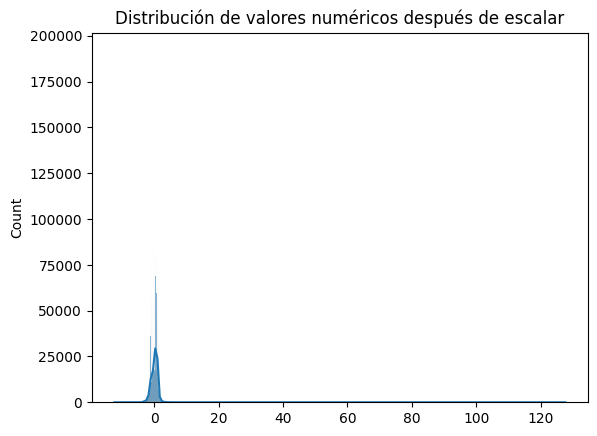

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df_merged[numeric_cols].stack(), kde=True)
plt.title("Distribución de valores numéricos después de escalar")
plt.show()

In [66]:
# Objetos pendientes (no numéricos ni booleanos)
df_merged.select_dtypes(exclude=['float64', 'bool'])

,mbid,title,artist,spotify_id,audio_md5_encoded
0,50971422-fed2-47ad-9a6f-eacf64ebb965,shades of green (utah saints 7″ remix),the mission,5lhyOLtwTpzSAyVlfeafOa,490adad56dbe0bef05e0867b40cfdc3c
1,76c66068-5d89-45c2-92be-22f7562dfa3c,mr. pleasant,the mission,2crKEyAPuOFiP4NRIblZBB,f3af995fb5b44213aeef50d6c0612fe0
2,e9da3272-429d-41a2-b84d-b0c09b99a286,118,mono inc.,4dfGvNJErGmUgAXnm1KyPW,79d4c347944baf7c9f7ac96d2851b973
3,86f3c7ed-ad1b-4fc8-9679-a89fb2a50435,someday somewhere somehow,to/die/for,3oUYUG2VYb7irH6466ypzM,fc4a3dcfb2fc25f7b265b5e7493a7e47
4,9c45c16f-addc-4a53-ad2b-f5481556bfcb,folie á deux,to/die/for,0D0ejw5SaBXYqEpkzfeNUU,bc9cc96cb18c3028a5fd0119dbe31851
...,...,...,...,...,...
58553,a97def93-bc18-4090-bc1f-6f1cfad084d4,serse: se bramate d’amar chi vi sdegna,vivica genaux,63an8JTowjutOf6KB9wYTb,6e1f564a80aa7d0ae40d697493765568
58554,d9205300-9df7-41a4-be67-0c69d62c4821,serse: gran pena è gelosia,vivica genaux,0geCPel2JqALsIKN7CAWRM,e3352424436a4dbeb325011e0255161a
58555,2d71ea0b-2951-42ff-b1d1-1db9835eea53,solitude,dronehands,6xH9xb3p4O4o34spdJbq4Y,4466a9241430028314b49c3701433380
58556,947c6b9b-42b3-4c5e-a3cb-963f02988fe8,murder on the dancefloor,sophie ellis‐bextor,4tKGFmENO69tZR9ahgZu48,3c1e7f924d4ca21dbc4d92f4fcaccfea


In [69]:
pop_corr = correlation_matrix['popularity'].sort_values(ascending=False)
print(pop_corr)

NameError: name 'correlation_matrix' is not defined

In [68]:
y = df_merged['popularity']  # o la que vayas a predecir
X = df_merged.drop(columns=['popularity', 'mbid', 'spotify_id', 'title', 'artist'])

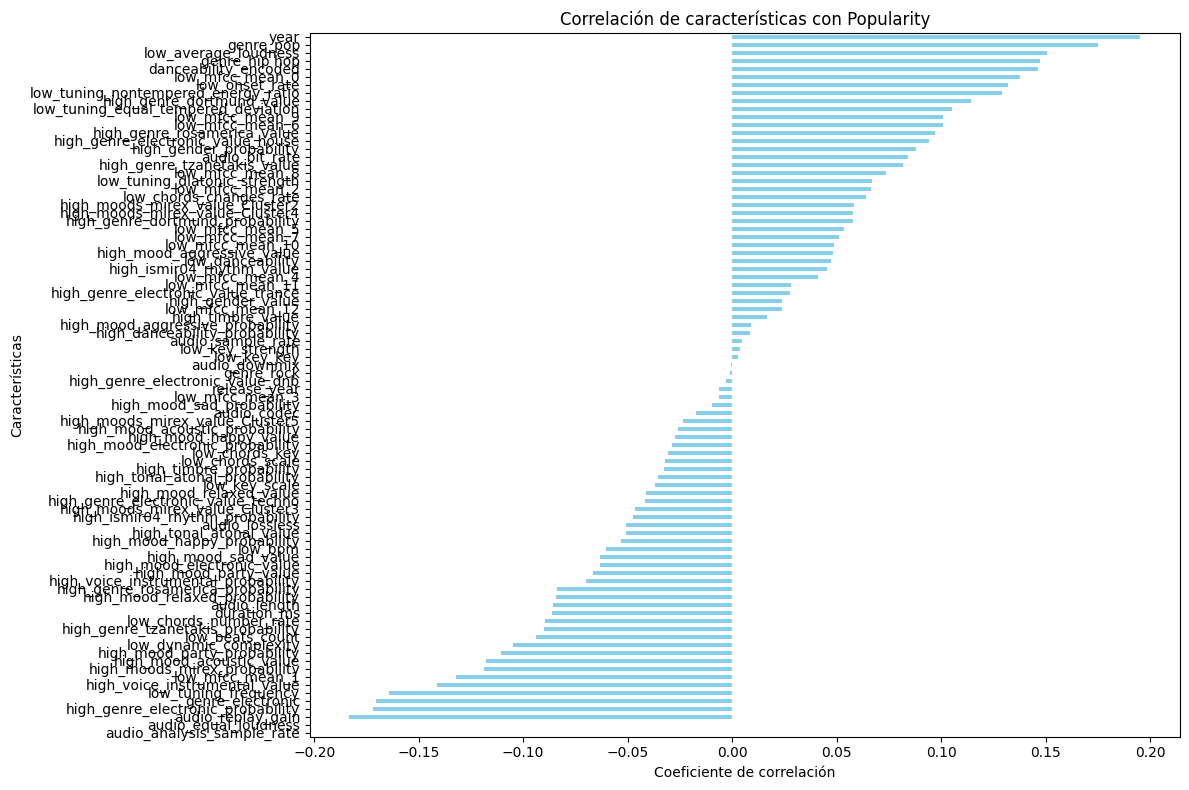

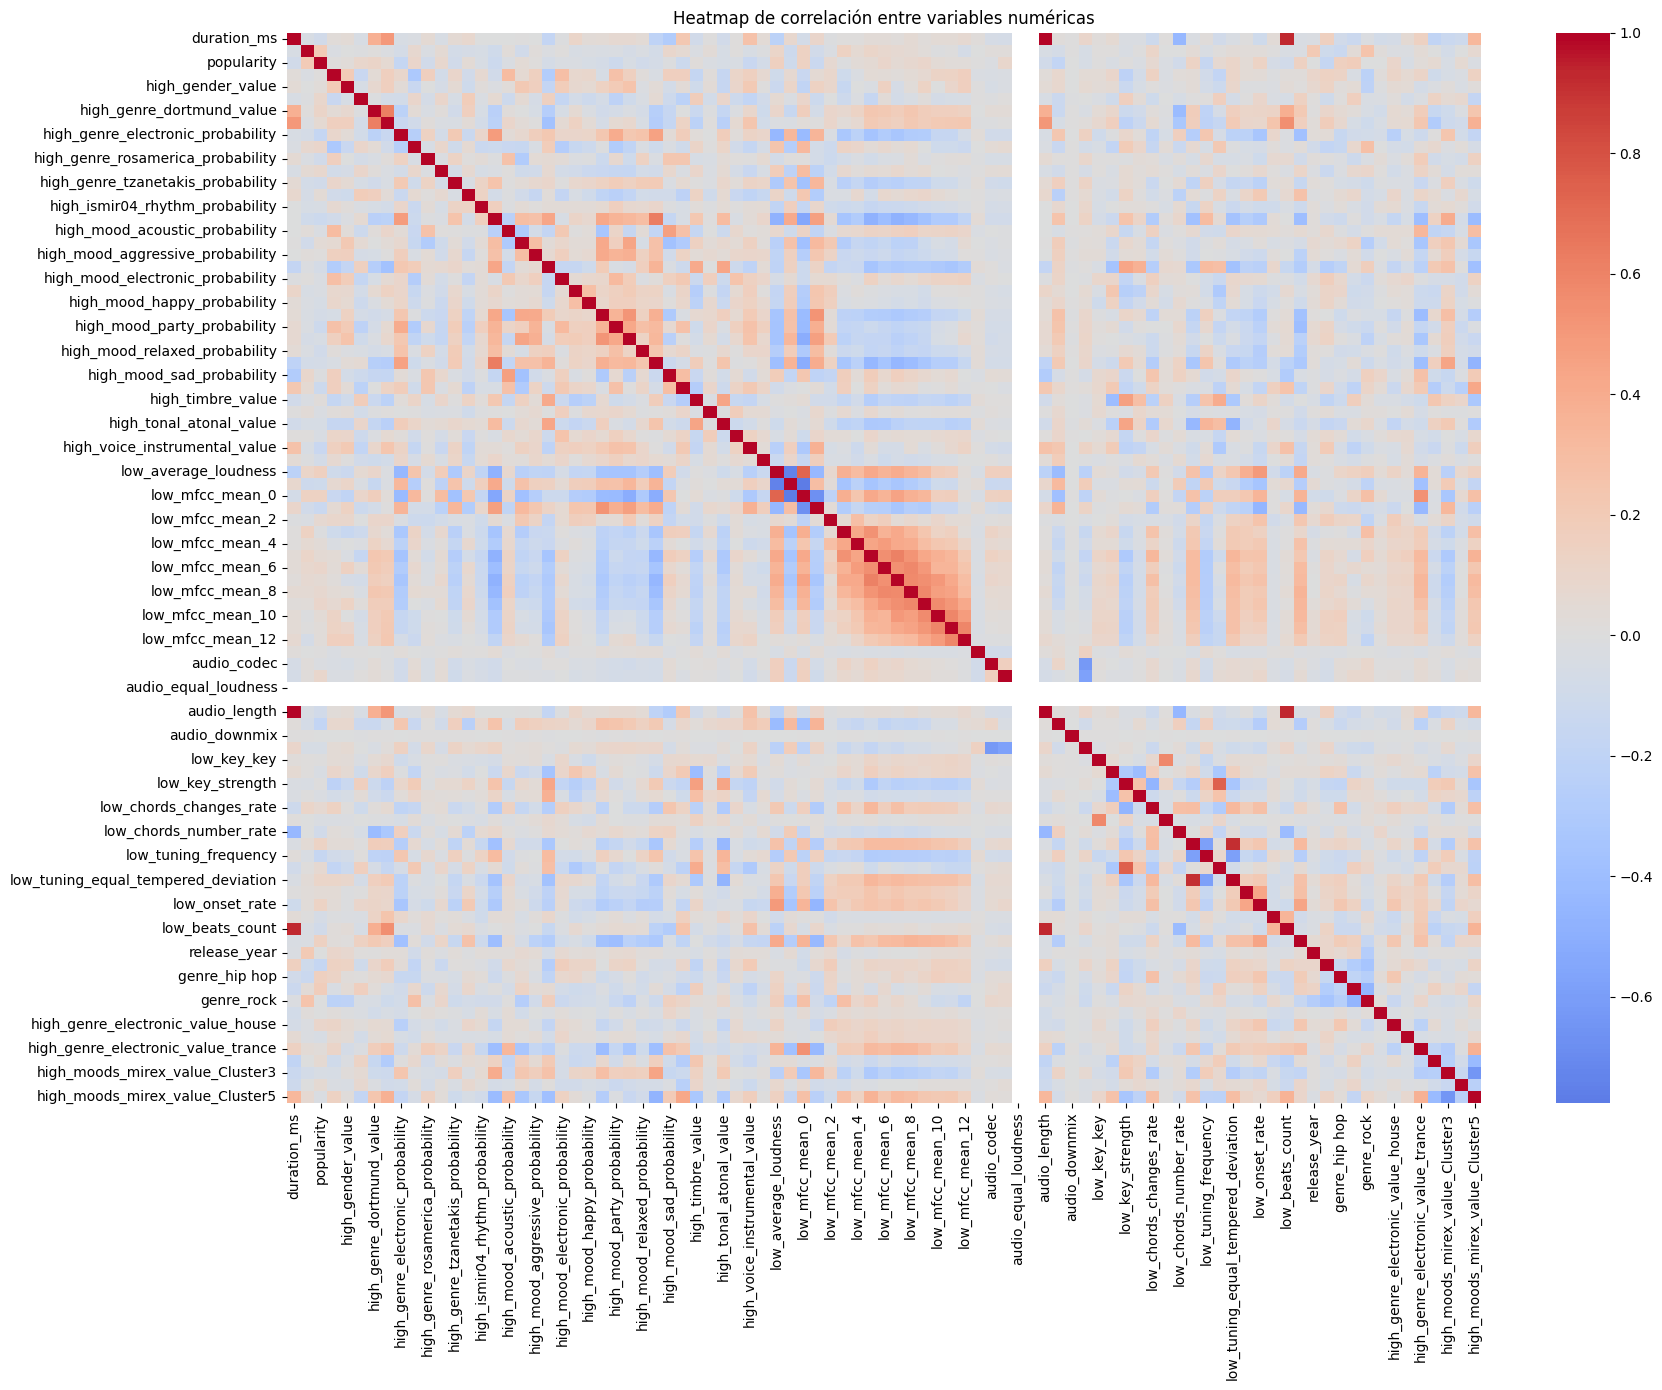

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de estar trabajando con solo columnas numéricas
numeric_cols = df_merged.select_dtypes(include=['float64', 'int64', 'bool'])

# 1. CORRELACIÓN CON POPULARITY
correlation_with_popularity = numeric_cols.corr()['popularity'].drop('popularity').sort_values(ascending=False)

# Gráfico de barras
plt.figure(figsize=(12, 8))
correlation_with_popularity.plot(kind='barh', color='skyblue')
plt.title('Correlación de características con Popularity')
plt.xlabel('Coeficiente de correlación')
plt.ylabel('Características')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 2. HEATMAP DE CORRELACIÓN
plt.figure(figsize=(18, 14))
sns.heatmap(numeric_cols.corr(), cmap='coolwarm', center=0, annot=False, fmt=".2f")
plt.title('Heatmap de correlación entre variables numéricas')
plt.tight_layout()
plt.show()

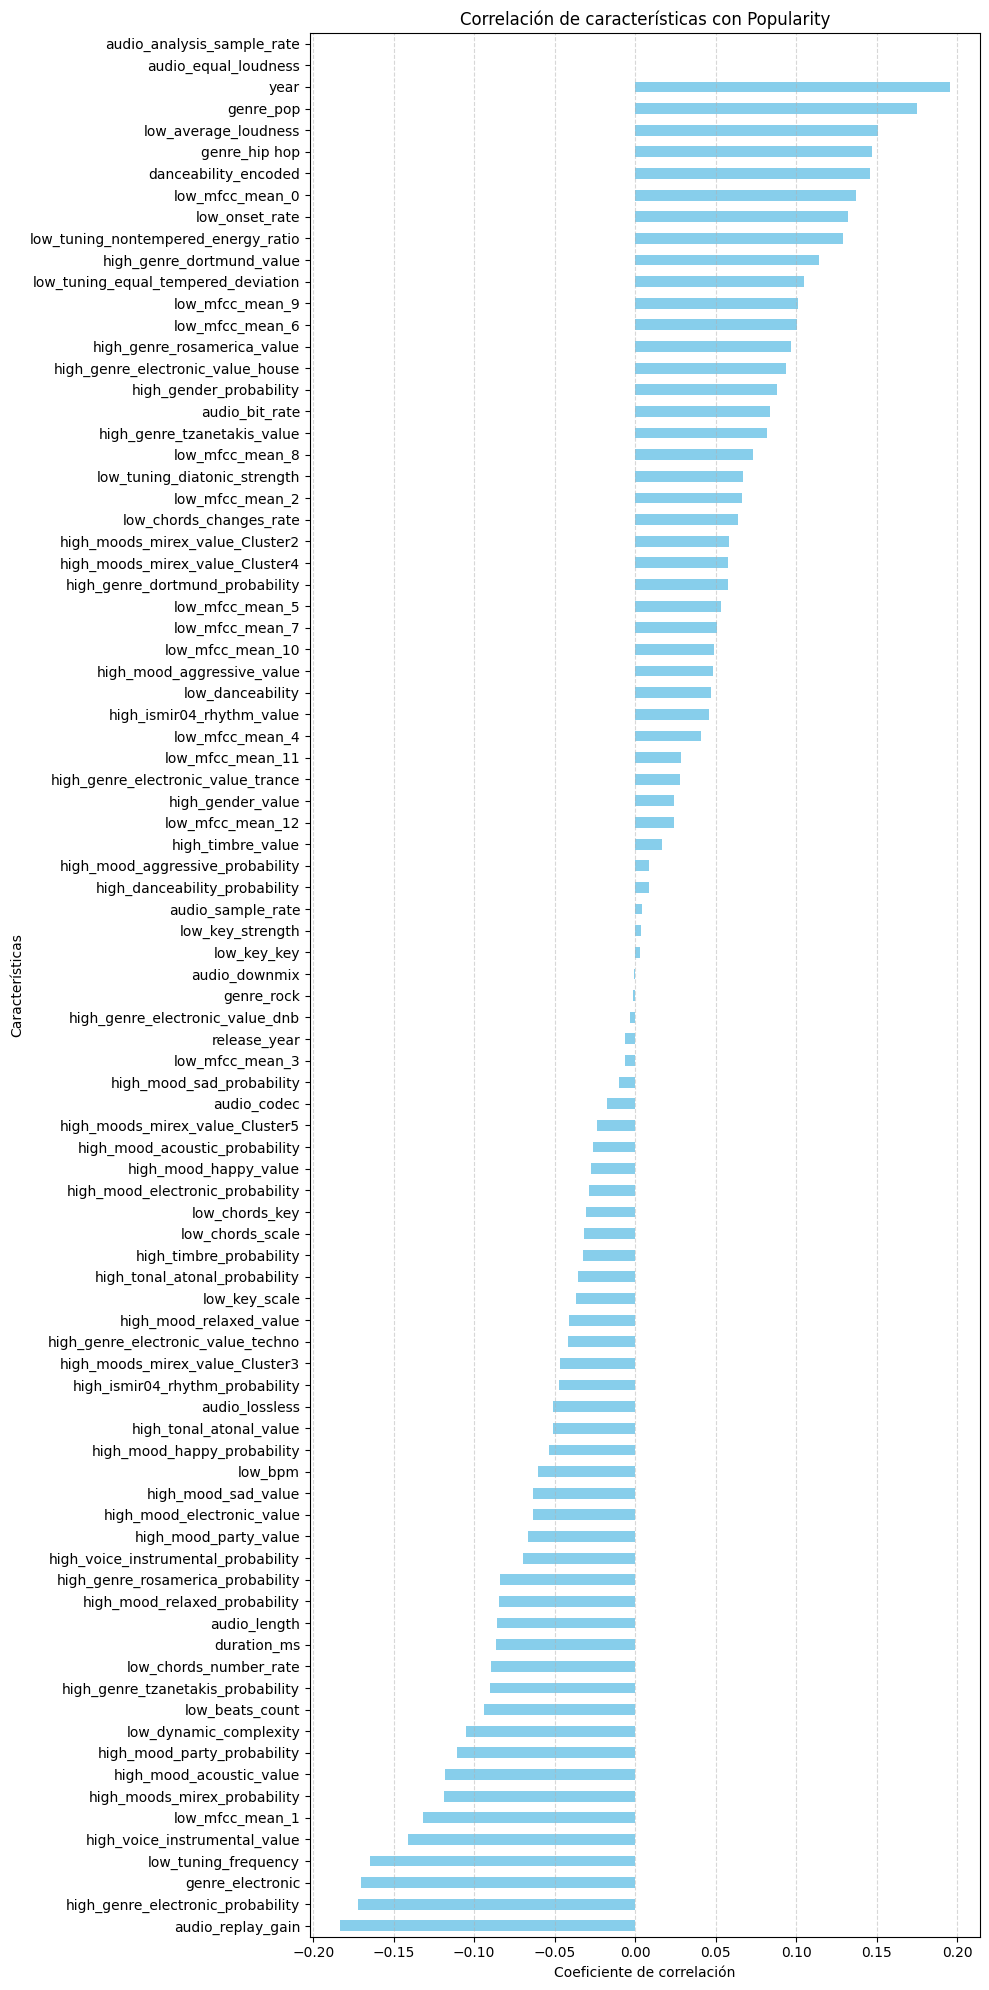

In [71]:
import matplotlib.pyplot as plt

# Orden descendente (más correlacionadas arriba)
correlation_with_popularity_sorted = correlation_with_popularity.sort_values()

plt.figure(figsize=(10, 20))  # Aumentamos la altura
correlation_with_popularity_sorted.plot(kind='barh', color='skyblue')
plt.title('Correlación de características con Popularity')
plt.xlabel('Coeficiente de correlación')
plt.ylabel('Características')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

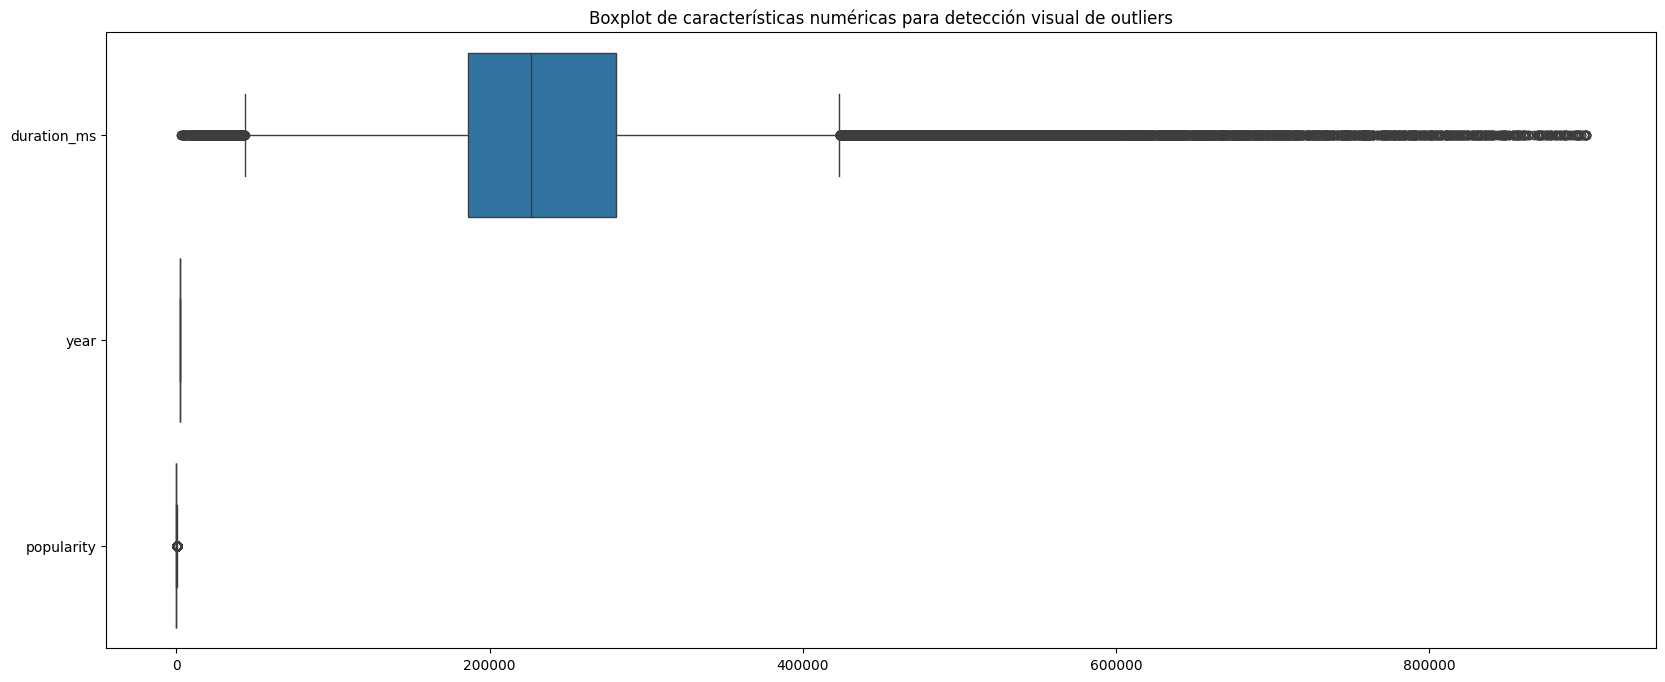

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(20, 8))
sns.boxplot(data=df[numeric_cols], orient='h')
plt.title("Boxplot de características numéricas para detección visual de outliers")
plt.show()

In [81]:
df_merged.drop(columns=["audio_md5_encoded"], inplace=True)
df_merged.head()


,mbid,title,artist,duration_ms,year,popularity,high_danceability_probability,high_gender_value,high_gender_probability,high_genre_dortmund_value,...,genre_pop,genre_rock,high_genre_electronic_value_dnb,high_genre_electronic_value_house,high_genre_electronic_value_techno,high_genre_electronic_value_trance,high_moods_mirex_value_Cluster2,high_moods_mirex_value_Cluster3,high_moods_mirex_value_Cluster4,high_moods_mirex_value_Cluster5
0,50971422-fed2-47ad-9a6f-eacf64ebb965,shades of green (utah saints 7″ remix),the mission,-0.109126,-1.207331,-1.120832,0.751844,-1.255937,0.385924,0.36344,...,False,True,False,False,False,True,False,False,False,True
1,76c66068-5d89-45c2-92be-22f7562dfa3c,mr. pleasant,the mission,-0.715209,-1.207331,-0.484215,-2.494120,-1.255937,1.381752,0.36344,...,False,True,False,False,False,False,False,False,True,False
2,e9da3272-429d-41a2-b84d-b0c09b99a286,118,mono inc.,0.195297,-1.207331,-0.827009,-0.250521,0.796219,0.757311,0.36344,...,False,True,False,False,False,True,False,False,False,True
3,86f3c7ed-ad1b-4fc8-9679-a89fb2a50435,someday somewhere somehow,to/die/for,1.338799,-1.207331,-0.973920,-0.528255,-1.255937,-1.599014,0.36344,...,False,True,False,False,False,True,False,False,False,True
4,9c45c16f-addc-4a53-ad2b-f5481556bfcb,folie á deux,to/die/for,1.630663,-1.207331,-0.631127,0.073444,-1.255937,0.255986,0.36344,...,False,True,False,False,False,False,False,True,False,False


In [82]:
df_merged.to_csv("/Users/andreagrain/code/PolloDK/Hitanalyzer/datos_limpios.csv", index=False)

In [83]:
df_merged.shape

(58558, 92)